# CARTERAS EFICIENTES

## La utilidad del inversor

Una cartera puede ser óptima para un inversor con baja aversión al riesgo pero subóptima para otro inversor con menor aversión al riesgo. Para resolver este problema creamos una función de utidad $U(\tilde{w})$.

$$\begin{align}
\tilde{w} &=\tilde{w}_0(1+r_p(w)) \tag{1}\\
U(\tilde{w}) &= U(\tilde{w}_0(1+r_p(w))) \tag{2}
\end{align}$$

donde $\tilde{w}$ es la riqueza al finalizar el periodo, $\tilde{w}_0$ es la riqueza inicial, $r_p$ es la rentabilidad de la cartera, la cual es aleatoria. Por tanto, deberemos incorporar la aversión al riesgo del inversor. En este contexto podremos hablar de maximizar la utilidad esperada:
$$\begin{align}
\underset{w}{max} f(w)&=\mathbb{E} \left[ U(\tilde{w}_0(1+r_p(w)))\right] \tag{3}\\
\underset{w}{max} f(w)&=\mathbb{E} \left[ U(\tilde{w}_0\left(1+\sum_i{w_ir_i}\right))\right] \nonumber
\end{align}$$

Optimizamos
$$\begin{align}
\frac{\partial f(w)}{w_i} &=U' \left(\tilde{w}_0(1+\sum_i{w_ir_i}\right)r_i=0 \tag{4}\\
\frac{\partial f(w)}{w_i^2} &=U'' \left(\tilde{w}_0(1+\sum_i{w_ir_i}\right)r^2_i<0 \tag{5}\\
\end{align}$$

La teoría económica indica que $U'(\tilde{w})$ debe ser positivo ya que el inversor prefiere más rentabilidad. Del mismo modo $U'(\tilde{w})$ debe ser negativa para reflejar la aversión al riesgo.

Markowitz(1952) el que porpició la Moderna Teoría de Carteras. Propone una función de utilidad cuadrática con una rendimientos que se comportan como una función distribución normal tipificadas por una media y varianza. Concretamente propone maximizar la siguiente función de utilidad:

$$\underset{w}{max} f(w)=w^TR-\lambda w^T\Sigma w\tag{6}$$ 

donde $\lambda$ es la aversión al riesgo del inversor que consideramos constante, $\Sigma$ es la matriz de varianza covarianza

$$\frac{\partial f(w)}{\partial w}=R-\lambda \Sigma w=0 \tag{7}$$

Dado que la función $f(w)$ es cóncava la condición de primer orden define un único máximo. Por tanto:
$$w=\frac{1}{2\lambda}\Sigma^{-1} \tag{8}R$$

## La frontera eficiente

Podemos replantear la definición de cartera eficiente con una única restricción

$$\begin{gather}
\underset{w}{max} \left(-w^T\Sigma w\right) \tag{9}\\
s.t. w^TR=\hat{R} \nonumber
\end{gather}$$

donde $\hat{R}$ es la rentabilidad deseada por el inversor. Utilizaremos un Lagrangiano para resolver el problema de optimización

$$\mathcal{L}(w,\upsilon)=\left(-w^T\Sigma w\right)+\lambda\left( w^TR-\hat{R}\right) \tag{10}$$

La condición de primer orden del proceso de optimización será:

$$\begin{align}
\frac{\partial L}{\partial w}=-2\Sigma w+ \lambda R&=0 \tag{11}\\
\frac{\partial L}{\partial \lambda} =w^TR-\hat{R}&=0 \tag{12}
\end{align}$$

Resolvemos el sistema de ecuaciones:

$$\begin{align}
\lambda R&=2\Sigma w \tag{13}\\
w&=\frac{\lambda}{2} \Sigma^{-1} R \tag{14}
\end{align}$$

Utilizamos la ecuación 12 para despejar $\lambda$

$$\begin{align}
w^TR&=\hat{R} \tag{15} \\
\left(\lambda \Sigma^{-1} R  \right)^TR&=2\hat{R} \tag{16} \\
\lambda &=\frac{2\hat{R}}{R^T\Sigma^{-1} R}\tag{17}
\end{align}$$

La creación de carteras exige tener en cuenta más restricciones. Así incorporamos una restricción adicional, no pdemos invertir más dinero del que tenemos.

$$\begin{gather}
\underset{w}{min} \left(w^T\Sigma w\right) \tag{18}\\
s.t. w^TR=\hat{R} \nonumber \\
w^T1=1\nonumber
\end{gather}$$

Volvemos a utilizar el Langranjiano

$$\mathcal{L}(w,\upsilon)=\left(-w^T\Sigma w\right)+\lambda_1\left( w^TR-\hat{R}\right)+\lambda_2\left( w^T1-1 \right) \tag{19}$$

Desarrollamos la condición de primer orden:

$$\begin{align}
\frac{\partial L}{\partial w}=-2\Sigma w+ \lambda_1 R&+\lambda_2 1=0 \tag{20}\\
\frac{\partial L}{\partial \lambda_1} =w^TR-\hat{R}&=0 \tag{21} \\
\frac{\partial L}{\partial \lambda_2} =w^T1-1&=0 \tag{22}
\end{align}$$

La resolución del sistema de ecuaciones nos lleva a:


$$\begin{align}
w &= \frac{1}{d}\left[c\Sigma^{-1}R-a\Sigma^{-1} 1 \right]\hat{R}+\frac{1}{d}\left[b\Sigma^{-1} 1-a\Sigma^{-1} R \right] \tag{23}\\
a &= 1^T\Sigma^{-1}R \nonumber \\
b &= R^T\Sigma^{-1}R \nonumber \\ 
c &= 1^T\Sigma^{-1}1 \nonumber\\
a &= bc-a^2  \nonumber
\end{align}$$

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt
import scipy.optimize as sco

A partir del desarrollo matemático definimos un función para representar gráficamente la frontera eficiente. 

1. Nos aseguramos que existe coherencia entre el número de activos utilizados en el vector de rentabilidades `ret`y el número de columnas de la matriz de varianza covarinaza `cov_mat`. Para ello utilizamos la función `assert`, que nos permite establecer una condición que se espera que sea verdadera en ese punto del programa. Si la condición es verdadera, el programa continúa su ejecución normalmente. Si la condición es falsa, se lanza una aviso 'Asegurate que el número de activos utilizados para calcular \ la rentabilidad coincide con el utilizado para esimar la matriz de varianza-covarianza.' y el programa se detiene.
2. Estimamos las constantes:
    - n representa el número de activos `n = len(ret)``
    - $a = 1^T\Sigma^{-1}R \Rightarrow$ `a = np.ones(n).T@np.linalg.inv(cov_mat)@ret`
        - `np.ones(n)` función de numpy que genera un vector columna de `n`unos.
        - `np.ones(n).T@np.linalg.inv(cov_mat)@ret` multiplicamos con numpys el vector de 1 con la inversa de la matriz de varianzas covarianzas y el vector de rentbilidades.
3. Generamos 5000 carteras eficientes a partir de las rentabilidades desesadas $\hat{R}$
    - `ret_arr = np.linspace(0.05,0.2,N)`genero 5000 valores para las rentabilidades comprendidas entre 0.05 y 0.20.
    - `vol_arr = np.zeros(N)`genero un numpy con 5000 ceros
    - `weight_arr = np.zeros((N, len(ret)))`genero un numpy que incluye 5000 vectores de ponderaciones de dimensión `n`  , incialmente todas las ponderaciones valen 0.
    - `for i in range(N):`genero un bucle de 5000 repeticiones. En dicho bucle calculamos las ponderaciones que guardamos en ` weight_arr[i,:] = w`, y las utilizamos para estimar las desviaciones típicas `vol_arr[i] = np.sqrt(w.T@cov_mat@w)`.
4. Representamos gráficamente las rentabilidades y su correspondiente desviación típica.
 


In [3]:
def plot_efficient_frontier(ret, cov_mat, N=5000):

    assert len(ret)==len(cov_mat), 'Asegurate que el número de activos utilizados para calcular \
    la rentabilidad coincide con el utilizado para esimar la matriz de varianza-covarianza.'

    # Estimamos las constantes
    n = len(ret)
    a = np.ones(n).T@np.linalg.inv(cov_mat)@ret
    b = ret.T@np.linalg.inv(cov_mat)@ret
    c = np.ones(n).T@np.linalg.inv(cov_mat)@np.ones(n)
    d = b*c-a**2

    # generamos 5000 carteras eficientes 
    ret_arr = np.linspace(0.05,0.2,N)
    vol_arr = np.zeros(N)
    weight_arr = np.zeros((N, len(ret)))
    
    for i in range(N):
        w = 1/d*(c*np.linalg.inv(cov_mat)@ret-a*np.linalg.inv(cov_mat)@np.ones(n))*ret_arr[i] + 1/d*(b*np.linalg.inv(cov_mat)@np.ones(n)-a*np.linalg.inv(cov_mat)@ret)
        vol_arr[i] = np.sqrt(w.T@cov_mat@w)
        weight_arr[i,:] = w

    # plot the efficient frontier
    plt.scatter(vol_arr, ret_arr)
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.show()
    
    return weight_arr, ret_arr, vol_arr

Identificamos los activos con los que queremos trabajar.

In [4]:
stocks_list = 'XLB XLF XLK XLP XLV' 
start_date = '2017-09-01'
end_date = '2022-12-01'

Utilizamos la biblioteca de yahoo finance para obtener los precios ajustados. Utilizamos `dropna()` para eliminar las filas con ausencia de datos.

In [6]:
df_price = yf.download(tickers=stocks_list, start=start_date,
                   end=end_date, interval="1d")['Adj Close'].dropna()
df_price.head()

[*********************100%***********************]  5 of 5 completed


,XLB,XLF,XLK,XLP,XLV
Date,,,,,
2017-09-01,48.803467,21.849606,54.747143,46.508533,73.103859
2017-09-05,48.248787,21.382090,54.262829,46.576221,72.788872
2017-09-06,48.372036,21.435020,54.309395,46.770817,73.139839
2017-09-07,48.451294,21.064537,54.495674,46.838505,73.949837
2017-09-08,48.433678,21.258598,54.048622,46.610058,74.282822


Calculamos las rentabilidades logarítmicas diarias. Las convertimos en anuales, suponiendo que un año tiene 252 días de negociación. Estimados la matriz de varianzas covarianzas  y la anualizamos. Con todo ello podemos representar gráficamente la frontera eficiente para el conjunto de activos seleccionados.

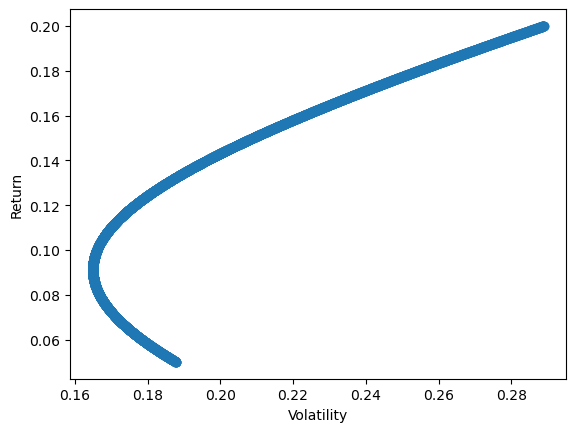

(array([[ 0.28232106,  0.04085055, -0.64583478,  1.01966662,  0.30299656],
        [ 0.28218105,  0.0407367 , -0.6454846 ,  1.01946867,  0.30309818],
        [ 0.28204104,  0.04062285, -0.64513442,  1.01927073,  0.3031998 ],
        ...,
        [-0.41730827, -0.52805712,  1.10401622,  0.03054287,  0.81080631],
        [-0.41744828, -0.52817097,  1.1043664 ,  0.03034492,  0.81090793],
        [-0.41758829, -0.52828482,  1.10471658,  0.03014698,  0.81100956]]),
 array([0.05      , 0.05003001, 0.05006001, ..., 0.19993999, 0.19996999,
        0.2       ]),
 array([0.18780069, 0.18776941, 0.18773815, ..., 0.28882284, 0.28887654,
        0.28893026]))

In [8]:
df_ret = np.log(df_price).diff().dropna()
ret = np.array(df_ret.mean()*252)  # convert to annualized return
cov_mat = np.array(df_ret.cov()*252)  # convert to annualized covariance
plot_efficient_frontier(ret, cov_mat)

## Cartera de mínima varianza

La cartera de mínima varianza se obtiene solucionando el siguiente problema de optimización:
$$\begin{gather}
\underset{w}{min} \left(w^T\Sigma w\right) \tag{24}\\
s.t. w^T1=1 \nonumber
\end{gather}$$

Estimamos el Lagranjiano y aplicamos la condición de primer orden

$$\begin{align}
\mathcal{L}(w,\lambda)&=\left(-w^T\Sigma w\right)-\lambda\left( w^T1=1\right)  \tag{24} \\
\frac{\partial L}{\partial w}&=2\Sigma w- \lambda 1=0 \tag{25} \\
\frac{\partial L}{\partial \lambda} &=w^T1-1=0 \tag{26}
\end{align} $$

El sistema de ecuaciones nos lleva a la siguiente solución:
$$w=\frac{\Sigma^{-1}1}{1^T\Sigma^{-1}1}$$


# PLANTEAMIENTO DE BLACK

In [2]:
pip install qpsolvers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 10.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.7/83.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.6/252.6 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 11.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from qpsolvers import solve_qp

### Finding the Market Portfolio: The Capital Market Line (CML)

In [2]:
# Input: Variance Covariance Matrix
var_cov_mat = np.array([[0.10,0.01,0.03,0.05],
                           [0.01,0.30,0.06,-0.04],
                           [0.03,0.06,0.40,0.02],
                           [0.05,-0.04,0.02,0.50]])

# Input: mean returns
assets_mean_ret = np.array([0.06, 0.08, 0.1, 0.15]).transpose()

In [3]:
# Function: Calculate Envelope Portfolio proportions in one step
def envelope_portfolio(var_cov_mat, assets_mean_ret, constant):
    inv_var_cov_mat = np.linalg.inv(var_cov_mat)
    ex_ret = assets_mean_ret - constant
    Z = np.dot(inv_var_cov_mat, ex_ret)
    Z_Sum = np.sum(Z) # Sum of Z's
    return Z/Z_Sum # Efficient Portfolio proportions

In [4]:
# Computing Portfolio X Asset Allocation
port_x_prop = envelope_portfolio(var_cov_mat, assets_mean_ret, 0)
print(pd.Series(port_x_prop))

0    0.355273
1    0.236230
2    0.155295
3    0.253202
dtype: float64


In [5]:
# Computing Portfolio Y Asset Allocation
port_y_prop = envelope_portfolio(var_cov_mat, assets_mean_ret, 0.04)
print(pd.Series(port_y_prop))

0    0.078206
1    0.268397
2    0.222739
3    0.430658
dtype: float64


In [6]:
# Mean Returns
port_x_ret = np.dot(assets_mean_ret, port_x_prop)
port_y_ret = np.dot(assets_mean_ret, port_y_prop)
print("Mean Returns:")
print(pd.Series([port_x_ret,port_y_ret],index=['X','Y']))

Mean Returns:
X    0.093725
Y    0.113037
dtype: float64


In [7]:
# Portfolios Variance
port_x_var = np.dot(port_x_prop, var_cov_mat).dot(port_x_prop.transpose())
port_y_var = np.dot(port_y_prop, var_cov_mat).dot(port_y_prop.transpose())
print("Portfolios Variance:")
print(pd.Series([port_x_var,port_y_var],index=['X','Y']))

Portfolios Variance:
X    0.086240
Y    0.141398
dtype: float64


In [8]:
# Covarinace(X,Y)
cov_xy = np.dot(port_x_prop, var_cov_mat).dot(port_y_prop.transpose())
print(pd.Series(cov_xy,index=["Cov(X,Y)"]))

Cov(X,Y)    0.10401
dtype: float64


In [9]:
# Portfolios Standard Deviations
port_x_sigma = math.sqrt(port_x_var)
port_y_sigma = math.sqrt(port_y_var)
print("Portfolios Sigma:")
print(pd.Series([port_x_sigma,port_y_sigma],index=['X','Y']))

Portfolios Sigma:
X    0.293666
Y    0.376029
dtype: float64


In [10]:
# Correlation Coefficient (Rho)
print(pd.Series(cov_xy / (port_x_sigma * port_y_sigma),index=["Rho"]))

Rho    0.941887
dtype: float64


### Plotting the Envelope

In [11]:
# Set an Array of Portfolio Weights
port_x_weight = np.arange(-4.5,7.5,0.5)
port_y_weight = 1-port_x_weight

In [12]:
# Portfolio Z Mean Return
port_z_ret = port_x_weight * port_x_ret + port_y_weight * port_y_ret

# Portfolios Sigma
port_z_sigma = (port_x_weight ** 2 * port_x_var + port_y_weight ** 2 * port_y_var + (port_x_weight * port_y_weight) * cov_xy * 2) ** 0.5

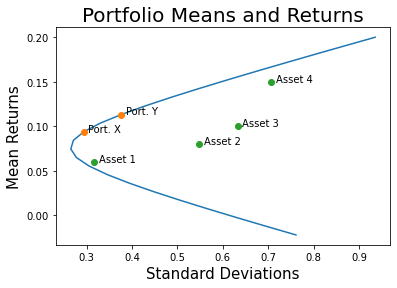

In [13]:
#Scatter Plot
plt.plot(port_z_sigma, port_z_ret) # envelope
assets_sigma = np.diag(var_cov_mat)**0.5
plt.plot([port_x_sigma, port_y_sigma], [port_x_ret, port_y_ret], 'o') # portfolios
plt.plot(assets_sigma, assets_mean_ret, 'o') # assets

# Labels
plt.text(port_x_sigma+0.01,port_x_ret,'Port. X')
plt.text(port_y_sigma+0.01,port_y_ret,'Port. Y')
plt.text(assets_sigma[0]+0.01,assets_mean_ret[0],'Asset 1')
plt.text(assets_sigma[1]+0.01,assets_mean_ret[1],'Asset 2')
plt.text(assets_sigma[2]+0.01,assets_mean_ret[2],'Asset 3')
plt.text(assets_sigma[3]+0.01,assets_mean_ret[3],'Asset 4')

# Titles and axes names
plt.title(r'Portfolio Means and Returns', fontsize = 20)
plt.xlabel(r'Standard Deviations', fontsize = 15)
plt.ylabel(r'Mean Returns', fontsize = 15)

# Show plot
plt.show()

### Computing the Global Minimum Variance Portfolio (GMVP)

In [14]:
# FUNCTION: GMVP as row
def GMVP_as_row(var_cov_mat):
    inv_var_cov_mat = np.linalg.inv(var_cov_mat)
    num = inv_var_cov_mat.sum(axis=1)
    den = inv_var_cov_mat.sum()
    return num / den

In [15]:
# GMVP Weights
GMVP_prop = GMVP_as_row(var_cov_mat)
print(pd.Series(GMVP_prop))

0    0.606238
1    0.207093
2    0.094205
3    0.092464
dtype: float64


In [16]:
# GMVP Mean Return
GMVP_mean_ret = np.dot(GMVP_prop,assets_mean_ret)
print(pd.Series(GMVP_mean_ret,index=["GMVP Mean Return"]))

GMVP Mean Return    0.076232
dtype: float64


In [17]:
# GMVP Variance
GMVP_variance = np.dot(GMVP_prop, var_cov_mat).dot(GMVP_prop.transpose())
print(pd.Series(GMVP_variance,index=["GMVP Variance"]))

GMVP Variance    0.070144
dtype: float64


In [18]:
# GMVP Sigma
GMVP_Sigma = np.dot(GMVP_prop, var_cov_mat).dot(GMVP_prop.transpose()) ** 0.5
print(pd.Series(GMVP_Sigma, index=["GMVP Sigma"]))

GMVP Sigma    0.264847
dtype: float64


### Efficient Portfolios Without Short Sales

In [19]:
# Input: Assets Mean Returns
assets_mean_ret = np.array([0.02, 0.02, 0.08, 0.1])
constant = 0.02

In [20]:
# Setting Target Function: Sharpe
def sharpe(x, assets_mean_ret, constant, var_cov_mat):
    ex_ret = assets_mean_ret - constant
    ret = np.dot(ex_ret, x)
    var = np.dot(x,var_cov_mat).dot(x.transpose())
    sigma = var ** 0.5
    sharpe = -1*(ret / sigma) # set sharpe to minus sign for minimization
    return sharpe

In [21]:
# No Short Constarints 
range = (0, math.inf)
bounds = (range,range,range,range)

# Enforce sum of weights = 100%
def sum_weights_constr(x):
    return np.sum(x) - 1 # this should be equal to 0

sum_weight = {'type': 'eq', 'fun': sum_weights_constr, 'args': ()}

In [22]:
# Stting initial guess
x0 = np.array([0.25,0.25,0.25,0.25])

In [23]:
# Solve
args = (assets_mean_ret, constant , var_cov_mat)
result = minimize(sharpe, x0, args = args, method = 'SLSQP', bounds = bounds,constraints=sum_weight)
# Max Sharpe weights
print(pd.Series(result.x)) 

0    0.000000e+00
1    4.253796e-18
2    4.798424e-01
3    5.201576e-01
dtype: float64


In [24]:
# Max Sharpe
print(pd.Series(-sharpe(result.x, assets_mean_ret, constant , var_cov_mat),index=["Sharpe"]))

Sharpe    0.144505
dtype: float64


#### No short (solver 2nd approach) - Adding a rP = 9% Constraint

In [25]:
# Quadratic Solver to solve: min. 1/2 x^T P x + q^T x s.t A x = b and G x <= h
P = var_cov_mat
q = np.zeros(4)

In [26]:
# Impose portfolio returns => 9% and all assets weights are => 0%
G = np.vstack((-assets_mean_ret,-np.identity(4)))
h = np.array([-0.09, 0, 0, 0, 0])

In [27]:
# Impose sum of weights = 100%
A = np.ones(4)
b = np.array([1.])

In [28]:
# Result
result = solve_qp(P, q, G=G, h=h, A=A, b=b)

In [29]:
# Portfolio Return
port_mean_ret = np.dot(result,assets_mean_ret)
print(pd.Series(port_mean_ret,index=["Portfolio Mean Return"]))

Portfolio Mean Return    0.09
dtype: float64


In [30]:
# Portfolio Variance
port_variance = np.dot(result, var_cov_mat).dot(result.transpose())
print(pd.Series(port_variance,index=["Portfolio Variance"]))

Portfolio Variance    0.23475
dtype: float64


In [31]:
# Portfolio Sigma
port_Sigma = port_variance ** 0.5
print(pd.Series(port_Sigma,index=["Portfolio Sigma"]))

Portfolio Sigma    0.48451
dtype: float64
